<a href="https://colab.research.google.com/github/Harsitha-08/Harsitha03/blob/main/notebook4287216246.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'road-accidents-india-2017-2020:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3317081%2F5771896%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240415%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240415T134609Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dbc9f08e688081ea92fa31492bbaae68dd20b6f4ff3bc238d35a8be3c004510a831966c8dc434b3a5de77e9b65edd1c68ba1d2c5aa6182848a3ab34e724b85cb176d3c1b49bab69f087b4b7a0f68b3b9f2de7b2ea69dfb3450aa1359581fe601a1baa25eff8bea16f70616689d791cb542cb1b73eaa8de252d6e18651d974bd773e8b9f98cccb5d93a30e937fdf2b5e7827e47d75293c3676e56715822d039ace6fbdb3a6e55ee8fb49c9c03b645f8231e604f0eb5a4bad12dddffa0aed22336339bb658c762b73378a8f08c0a44ea0ec061d087661cf4f59efd9f082b3c2913c887dde3c6d7b8a05e49b87dfd538b860463268bb314062d418f51569b6f5df45'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/road-accidents-india-2017-2020/India_Injury_Road_Accident_Fatality_2017-2020.csv


In [ ]:
rac = pd.read_csv("/kaggle/input/road-accidents-india-2017-2020/India_Injury_Road_Accident_Fatality_2017-2020.csv")



In [ ]:
rac.head(5)


,State,Road Accidents during 2018,Road Accidents during 2019,Road Accidents during 2020,Accidents Per Lakh Population - 2017,Total Number of Accidents Per Lakh Population - 2018,Total Number of Accidents Per Lakh Population - 2019,Total Number of Accidents Per Lakh Population - 2020,"Accidents per 10,000 Vehicles - 2017","Accidents per 10,000 Vehicles - 2018",...,Injury Per Lakh Population - 2018,Injury Per Lakh Population - 2019,Injury Per Lakh Population - 2020,"Road Accidents per 10,000 Vehicles- 2016","Road Accidents per 10,000 Vehicles- 2017","Road Accidents per 10,000 Vehicles- 2018","Road Accidents per 10,000 Vehicles- 2019","Injury per 10,000 Km of Roads - 2016","Injury per 10,000 Km of Roads - 2017","Injury per 10,000 Km of Roads - 2018"
0,Andhra Pradesh,24475,21992,19509.0,28.7,27.1,24.2,21.5,26.7,22.7,...,26.152011,27.254511,21.633003,31.480742,24.366402,22.803785,16.405669,1575.700850,1329.150122,1128.330253
1,Arunachal Pradesh,277,237,134.0,18.0,20.5,17.3,9.8,13.4,13.2,...,24.086503,22.821270,13.533285,11.935653,17.957514,14.723190,8.038026,102.957396,87.237436,61.121797
2,Assam,8248,8350,6595.0,21.6,24.6,24.7,19.5,23.7,24.0,...,22.236628,22.296813,15.562973,21.874856,24.350663,21.711233,13.384929,187.029619,218.339022,217.485279
3,Bihar,9600,10007,8639.0,8.3,8.9,9.2,8.0,14.2,13.0,...,6.289551,6.716188,6.473997,10.969790,10.693334,9.785413,8.202794,291.257476,318.732481,247.994426
4,Chhattisgarh,13864,13899,11656.0,51.2,51.8,51.4,43.1,25.9,23.9,...,48.002869,48.876111,38.812532,26.089024,24.255861,22.594821,16.477744,1309.893853,1299.510095,1276.102461


In [ ]:
rac.shape


(37, 45)

In [ ]:
rac.size


1665

In [ ]:
rac.describe().round(2)



,Road Accidents during 2018,Road Accidents during 2019,Road Accidents during 2020,Accidents Per Lakh Population - 2017,Total Number of Accidents Per Lakh Population - 2018,Total Number of Accidents Per Lakh Population - 2019,Total Number of Accidents Per Lakh Population - 2020,"Accidents per 10,000 Vehicles - 2017","Accidents per 10,000 Vehicles - 2018","Accidents per 10,000 Vehicles - 2019",...,Injury Per Lakh Population - 2018,Injury Per Lakh Population - 2019,Injury Per Lakh Population - 2020,"Road Accidents per 10,000 Vehicles- 2016","Road Accidents per 10,000 Vehicles- 2017","Road Accidents per 10,000 Vehicles- 2018","Road Accidents per 10,000 Vehicles- 2019","Injury per 10,000 Km of Roads - 2016","Injury per 10,000 Km of Roads - 2017","Injury per 10,000 Km of Roads - 2018"
count,37.00,37.00,36.00,36.00,36.00,36.00,36.00,37.00,36.00,36.00,...,37.00,37.00,37.00,37.00,36.00,36.00,36.00,37.00,37.00,37.00
mean,25245.62,24270.38,20341.00,37.14,36.41,34.10,26.13,17.19,16.40,14.43,...,36.14,33.84,24.11,21.30,18.74,16.96,11.57,1113.58,1035.52,917.84
std,76481.81,73512.48,60695.64,35.99,34.06,31.51,22.80,10.01,9.16,8.43,...,30.94,29.22,20.56,18.81,14.97,12.63,8.44,1127.13,1073.82,867.42
min,3.00,1.00,1.00,1.20,3.60,1.20,0.00,0.60,1.70,0.60,...,0.00,0.00,0.00,0.62,1.66,0.55,0.55,47.81,72.65,41.87
25%,430.00,482.00,457.50,17.50,16.73,16.00,11.22,11.60,10.58,8.80,...,13.79,12.76,9.34,8.64,8.05,8.24,5.97,318.60,318.73,267.25
50%,6428.00,5796.00,5031.50,26.95,26.45,24.45,20.30,15.40,14.65,13.20,...,26.18,23.03,18.31,16.19,15.29,14.42,9.47,867.98,811.26,733.24
75%,21743.00,21570.00,19128.50,40.65,42.90,38.55,31.08,23.70,21.80,18.70,...,48.00,47.68,32.39,27.55,24.35,22.65,16.42,1532.81,1329.15,1276.10
max,467044.00,449002.00,366138.00,189.40,175.20,158.50,109.40,40.50,38.90,38.40,...,126.06,127.08,83.80,97.75,68.38,51.84,35.20,5485.93,5326.65,3771.38


In [ ]:
rac.isna().sum()



State                                                    0
Road Accidents  during 2018                              0
 Road Accidents  during 2019                             0
Road Accidents  during 2020                              1
Accidents  Per Lakh Population - 2017                    1
Total Number of Accidents  Per Lakh Population - 2018    1
Total Number of Accidents  Per Lakh Population - 2019    1
Total Number of Accidents  Per Lakh Population - 2020    1
Accidents per 10,000 Vehicles - 2017                     0
Accidents per 10,000 Vehicles - 2018                     1
Accidents per 10,000 Vehicles - 2019                     1
Accidents per 10,000 Km of Roads - 2017                  0
Accidents per 10,000 Km of Roads - 2018                  0
Persons Killed 2017                                      0
Persons Killed 2018                                      0
Persons Killed 2019                                      0
Persons Killed 2020                                     

In [ ]:
rac.dropna(inplace=True)


In [ ]:
rac.isnull().any()

State                                                    False
Road Accidents  during 2018                              False
 Road Accidents  during 2019                             False
Road Accidents  during 2020                              False
Accidents  Per Lakh Population - 2017                    False
Total Number of Accidents  Per Lakh Population - 2018    False
Total Number of Accidents  Per Lakh Population - 2019    False
Total Number of Accidents  Per Lakh Population - 2020    False
Accidents per 10,000 Vehicles - 2017                     False
Accidents per 10,000 Vehicles - 2018                     False
Accidents per 10,000 Vehicles - 2019                     False
Accidents per 10,000 Km of Roads - 2017                  False
Accidents per 10,000 Km of Roads - 2018                  False
Persons Killed 2017                                      False
Persons Killed 2018                                      False
Persons Killed 2019                                    

In [ ]:
rac.isnull().any()

State                                                    False
Road Accidents  during 2018                              False
 Road Accidents  during 2019                             False
Road Accidents  during 2020                              False
Accidents  Per Lakh Population - 2017                    False
Total Number of Accidents  Per Lakh Population - 2018    False
Total Number of Accidents  Per Lakh Population - 2019    False
Total Number of Accidents  Per Lakh Population - 2020    False
Accidents per 10,000 Vehicles - 2017                     False
Accidents per 10,000 Vehicles - 2018                     False
Accidents per 10,000 Vehicles - 2019                     False
Accidents per 10,000 Km of Roads - 2017                  False
Accidents per 10,000 Km of Roads - 2018                  False
Persons Killed 2017                                      False
Persons Killed 2018                                      False
Persons Killed 2019                                    

In [ ]:
rac.info()


<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 36
Data columns (total 45 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   State                                                  35 non-null     object 
 1   Road Accidents  during 2018                            35 non-null     int64  
 2    Road Accidents  during 2019                           35 non-null     int64  
 3   Road Accidents  during 2020                            35 non-null     float64
 4   Accidents  Per Lakh Population - 2017                  35 non-null     float64
 5   Total Number of Accidents  Per Lakh Population - 2018  35 non-null     float64
 6   Total Number of Accidents  Per Lakh Population - 2019  35 non-null     float64
 7   Total Number of Accidents  Per Lakh Population - 2020  35 non-null     float64
 8   Accidents per 10,000 Vehicles - 2017                   35

In [ ]:
rac.columns

Index(['State', 'Road Accidents  during 2018', ' Road Accidents  during 2019',
       'Road Accidents  during 2020', 'Accidents  Per Lakh Population - 2017',
       'Total Number of Accidents  Per Lakh Population - 2018',
       'Total Number of Accidents  Per Lakh Population - 2019',
       'Total Number of Accidents  Per Lakh Population - 2020',
       'Accidents per 10,000 Vehicles - 2017',
       'Accidents per 10,000 Vehicles - 2018',
       'Accidents per 10,000 Vehicles - 2019',
       'Accidents per 10,000 Km of Roads - 2017',
       'Accidents per 10,000 Km of Roads - 2018', 'Persons Killed 2017',
       'Persons Killed 2018', 'Persons Killed 2019', 'Persons Killed 2020',
       'Share in Death- 2017', 'Share in Death- 2018', 'Share in Death- 2019',
       'Share in Death- 2020', 'Persons Killed Per Lakh Population - 2017',
       'Persons Killed Per Lakh Population - 2018',
       'Persons Killed Per Lakh Population - 2019',
       'Persons Killed Per Lakh Population - 2020',

In [ ]:
rac.columns=[i.replace(' ','_')for i in rac.columns]
rac.columns


Index(['State', 'Road_Accidents__during_2018', '_Road_Accidents__during_2019',
       'Road_Accidents__during_2020', 'Accidents__Per_Lakh_Population_-_2017',
       'Total_Number_of_Accidents__Per_Lakh_Population_-_2018',
       'Total_Number_of_Accidents__Per_Lakh_Population_-_2019',
       'Total_Number_of_Accidents__Per_Lakh_Population_-_2020',
       'Accidents_per_10,000_Vehicles_-_2017',
       'Accidents_per_10,000_Vehicles_-_2018',
       'Accidents_per_10,000_Vehicles_-_2019',
       'Accidents_per_10,000_Km_of_Roads_-_2017',
       'Accidents_per_10,000_Km_of_Roads_-_2018', 'Persons_Killed_2017',
       'Persons_Killed_2018', 'Persons_Killed_2019', 'Persons_Killed_2020',
       'Share_in_Death-_2017', 'Share_in_Death-_2018', 'Share_in_Death-_2019',
       'Share_in_Death-_2020', 'Persons_Killed_Per_Lakh_Population_-_2017',
       'Persons_Killed_Per_Lakh_Population_-_2018',
       'Persons_Killed_Per_Lakh_Population_-_2019',
       'Persons_Killed_Per_Lakh_Population_-_2020',

In [ ]:
years =['Road_Accidents__during_2018', '_Road_Accidents__during_2019',
       'Road_Accidents__during_2020', 'Accidents__Per_Lakh_Population_-_2017',
       'Total_Number_of_Accidents__Per_Lakh_Population_-_2018',
       'Total_Number_of_Accidents__Per_Lakh_Population_-_2019',
       'Total_Number_of_Accidents__Per_Lakh_Population_-_2020',
       'Accidents_per_10,000_Vehicles_-_2017',
       'Accidents_per_10,000_Vehicles_-_2018',
       'Accidents_per_10,000_Vehicles_-_2019',
       'Accidents_per_10,000_Km_of_Roads_-_2017',
       'Accidents_per_10,000_Km_of_Roads_-_2018', 'Persons_Killed_2017',
       'Persons_Killed_2018', 'Persons_Killed_2019', 'Persons_Killed_2020',
       'Share_in_Death-_2017', 'Share_in_Death-_2018', 'Share_in_Death-_2019',
       'Share_in_Death-_2020', 'Persons_Killed_Per_Lakh_Population_-_2017',
       'Persons_Killed_Per_Lakh_Population_-_2018',
       'Persons_Killed_Per_Lakh_Population_-_2019',
       'Persons_Killed_Per_Lakh_Population_-_2020',
       'Persons_Killed_per_10,000_Vehicles_-_2017',
       'Persons_Killed_per_10,000_Vehicles_-_2018',
       'Persons_Killed_per_10,000_Vehicles_-_2019',
       'Persons_Killed_per_10,000_Km_of_Roads_-_2017',
       'Persons_Killed_per_10,000_Km_of_Roads_-_2018',
       'Persons_Injured_-_2017', 'Persons_Injured_-_2018',
       'Persons_Injured_-_2019', 'Persons_Injured_-_2020',
       'Injury_Per_Lakh_Population_-_2017',
       'Injury_Per_Lakh_Population_-_2018',
       'Injury_Per_Lakh_Population_-_2019',
       'Injury_Per_Lakh_Population_-_2020',
       'Road_Accidents_per_10,000_Vehicles-_2016',
       'Road_Accidents_per_10,000_Vehicles-_2017',
       'Road_Accidents_per_10,000_Vehicles-_2018',
       'Road_Accidents_per_10,000_Vehicles-_2019',
       'Injury_per_10,000_Km_of_Roads_-_2016',
       'Injury_per_10,000_Km_of_Roads_-_2017',
       'Injury_per_10,000_Km_of_Roads_-_2018']
sorted_rac = rac.sort_values(by=years, ascending=False)
sorted_rac.head(5)

,State,Road_Accidents__during_2018,_Road_Accidents__during_2019,Road_Accidents__during_2020,Accidents__Per_Lakh_Population_-_2017,Total_Number_of_Accidents__Per_Lakh_Population_-_2018,Total_Number_of_Accidents__Per_Lakh_Population_-_2019,Total_Number_of_Accidents__Per_Lakh_Population_-_2020,"Accidents_per_10,000_Vehicles_-_2017","Accidents_per_10,000_Vehicles_-_2018",...,Injury_Per_Lakh_Population_-_2018,Injury_Per_Lakh_Population_-_2019,Injury_Per_Lakh_Population_-_2020,"Road_Accidents_per_10,000_Vehicles-_2016","Road_Accidents_per_10,000_Vehicles-_2017","Road_Accidents_per_10,000_Vehicles-_2018","Road_Accidents_per_10,000_Vehicles-_2019","Injury_per_10,000_Km_of_Roads_-_2016","Injury_per_10,000_Km_of_Roads_-_2017","Injury_per_10,000_Km_of_Roads_-_2018"
36,Total,467044,449002,366138.0,35.8,35.6,33.8,27.6,18.4,17.1,...,36.163517,34.396197,26.256415,20.406763,17.818449,16.534117,11.719083,998.062331,939.273429,849.093685
23,Tamil Nadu,63920,57228,45484.0,93.6,90.9,81.0,64.4,25.1,22.8,...,106.409982,95.440976,71.584746,30.810200,28.548430,23.941248,16.752511,2856.746851,2851.060190,2486.487960
13,Madhya Pradesh,51397,50669,45266.0,66.7,63.4,61.7,55.1,40.5,38.9,...,68.291647,65.123735,56.561229,51.639699,41.414145,40.015541,35.196947,1984.275503,1595.253414,1451.100909
27,Uttar Pradesh,42568,42572,34243.0,17.2,18.7,18.4,14.8,14.8,14.5,...,13.194027,12.681020,9.670946,11.486288,11.294012,9.842552,6.850686,650.881207,692.994475,663.071959
11,Karnataka,41707,40658,34178.0,67.1,65.2,63.1,53.1,23.8,21.5,...,81.283203,78.902340,61.313461,32.507834,28.851746,26.028089,18.742747,1532.811340,1428.146558,1423.026970


In [ ]:
states = sorted_rac['State']
states


36                         Total 
23                     Tamil Nadu
13                 Madhya Pradesh
27                  Uttar Pradesh
11                      Karnataka
12                         Kerala
14                    Maharashtra
0                  Andhra Pradesh
21                      Rajasthan
6                         Gujarat
4                    Chhattisgarh
28                    West Bengal
19                         Odisha
7                         Haryana
3                           Bihar
2                           Assam
33                          Delhi
20                         Punjab
9               Jammu and Kashmir
10                      Jharkhand
5                             Goa
8                Himachal Pradesh
35                     Puducherry
26                    Uttarakhand
15                        Manipur
25                        Tripura
18                       Nagaland
16                      Meghalaya
30                     Chandigarh
1             

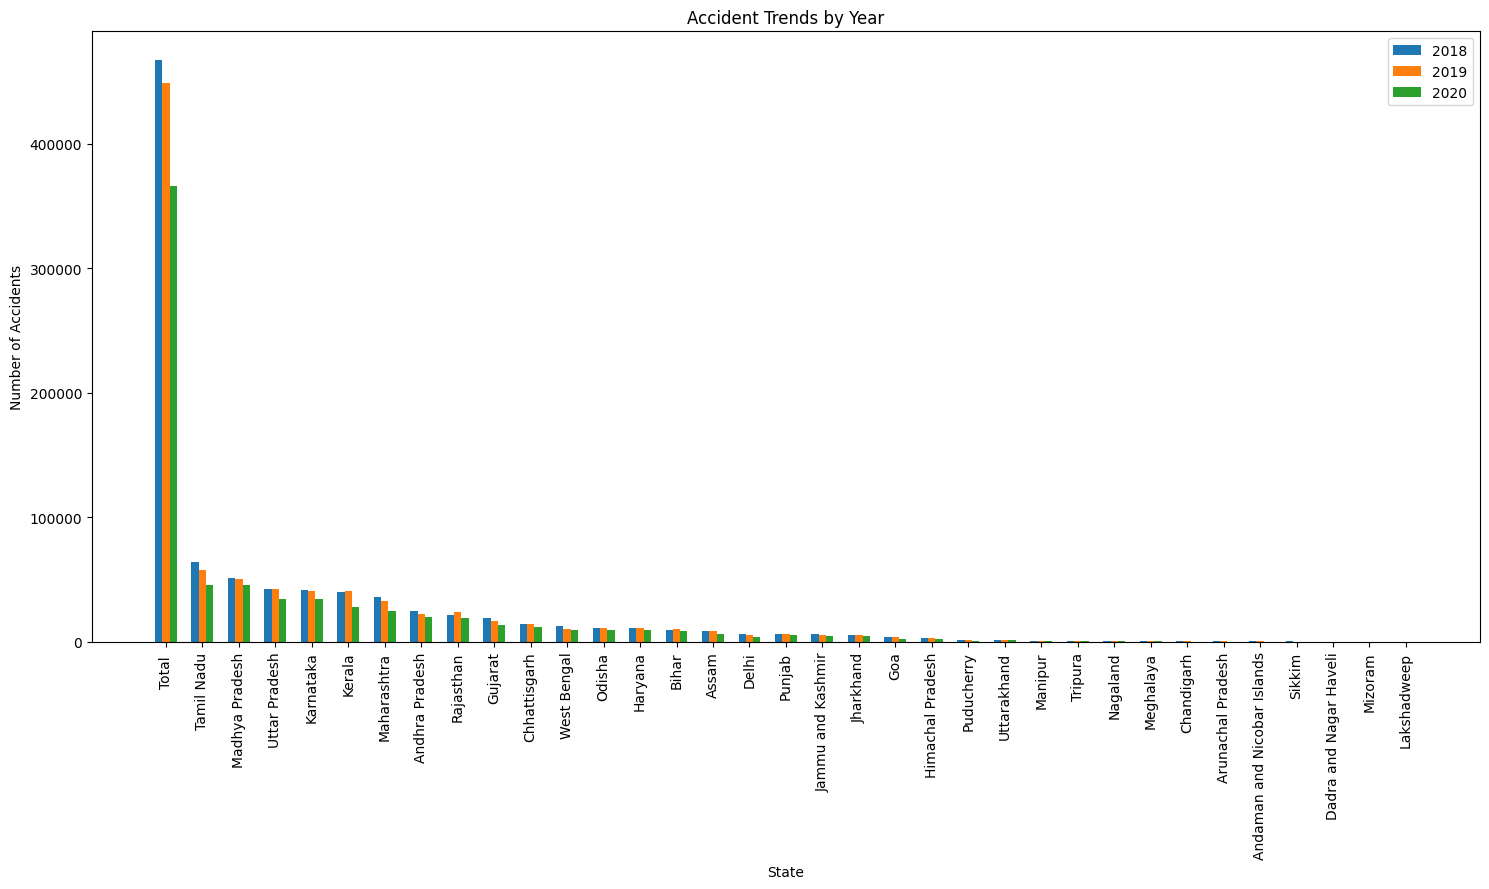

In [ ]:
import matplotlib.pyplot as plt
# Get the accident counts for each year
accidents_2018 = sorted_rac['Road_Accidents__during_2018']
accidents_2019 = sorted_rac['_Road_Accidents__during_2019']
accidents_2020 = sorted_rac['Road_Accidents__during_2020']

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 9))

# Plot the data
bar_width = 0.2
index = range(len(states))
ax.bar(index, accidents_2018, width=bar_width, label='2018')
ax.bar([i + bar_width for i in index], accidents_2019, width=bar_width, label='2019')
ax.bar([i + 2 * bar_width for i in index], accidents_2020, width=bar_width, label='2020')

# Set the x-axis labels to be the state names
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(states, rotation=90)

# Set labels and title
ax.set_xlabel('State')
ax.set_ylabel('Number of Accidents')
ax.set_title('Accident Trends by Year')

# Add a legend
ax.legend()
# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
highest_2017=rac['Accidents__Per_Lakh_Population_-_2017'].max()
lowest_2017 = rac['Accidents__Per_Lakh_Population_-_2017'].min()

highest_2018=rac['Total_Number_of_Accidents__Per_Lakh_Population_-_2018'].max()
lowest_2018 = rac['Total_Number_of_Accidents__Per_Lakh_Population_-_2018'].min()


highest_2019 = rac['Total_Number_of_Accidents__Per_Lakh_Population_-_2019'].max()
lowest_2019 = rac['Total_Number_of_Accidents__Per_Lakh_Population_-_2019'].min()

highest_2020 = rac['Total_Number_of_Accidents__Per_Lakh_Population_-_2020'].max()
lowest_2020 = rac['Total_Number_of_Accidents__Per_Lakh_Population_-_2019'].min()


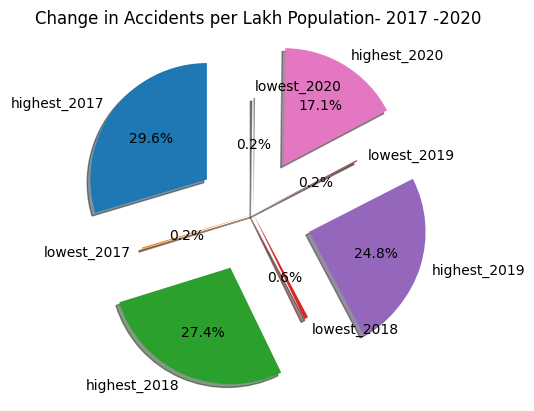

In [ ]:
labels = ['highest_2017','lowest_2017','highest_2018', 'lowest_2018', 'highest_2019', 'lowest_2019', 'highest_2020', 'lowest_2020']
values = [highest_2017,lowest_2017,highest_2018, lowest_2018, highest_2019, lowest_2019, highest_2020, lowest_2020]
plt.pie(values, labels=labels, autopct='%1.1f%%',
        startangle=90,explode =[0.5,0,0.5,0,0.5,0,0.5,0],shadow = 'True')
plt.title('Change in Accidents per Lakh Population- 2017 -2020')
plt.axis('equal')
plt.show()


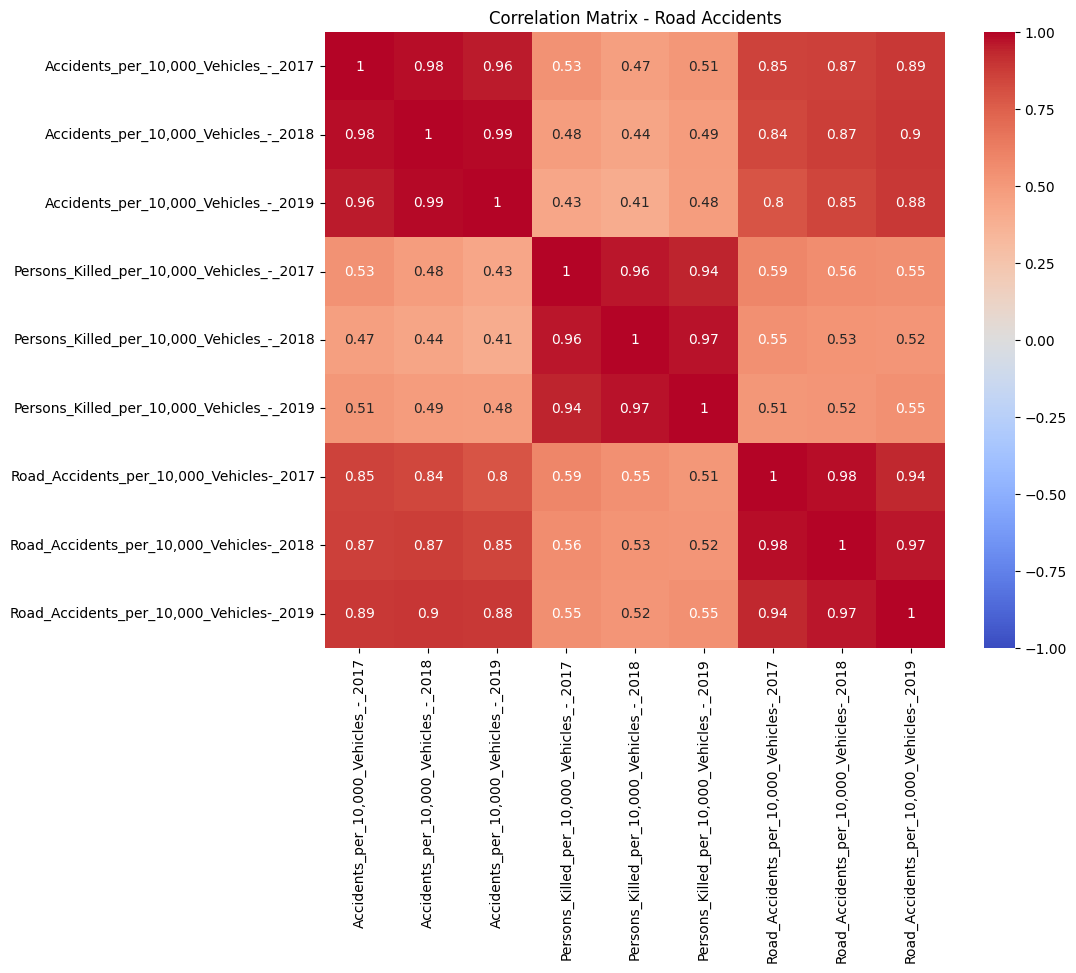

In [ ]:
import seaborn as sns
columns = [
    'Accidents_per_10,000_Vehicles_-_2017',
    'Accidents_per_10,000_Vehicles_-_2018',
    'Accidents_per_10,000_Vehicles_-_2019',
    'Persons_Killed_per_10,000_Vehicles_-_2017',
    'Persons_Killed_per_10,000_Vehicles_-_2018',
    'Persons_Killed_per_10,000_Vehicles_-_2019',
    'Road_Accidents_per_10,000_Vehicles-_2017',
    'Road_Accidents_per_10,000_Vehicles-_2018',
    'Road_Accidents_per_10,000_Vehicles-_2019'
]
accidents_data = rac[columns]

# Calculate the correlation matrix
correlation_matrix = accidents_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix - Road Accidents')
plt.show()

In [ ]:
columns = ['State', 'Persons_Killed_2017', 'Persons_Killed_2018', 'Persons_Killed_2019', 'Persons_Killed_2020']
persons_killed = rac[columns]

# Calculate the trend in the number of persons killed from 2017 to 2020
persons_killed['Trend'] = persons_killed['Persons_Killed_2020'] - persons_killed['Persons_Killed_2017']

# Identify states with consistently high fatality rates
high_fatality_states = persons_killed[persons_killed['Trend'] > 0]

# Print the trend in the number of persons killed and states with consistently high fatality rates
print(persons_killed[['State', 'Persons_Killed_2017', 'Persons_Killed_2018', 'Persons_Killed_2019', 'Persons_Killed_2020', 'Trend']])
print(high_fatality_states[['State', 'Trend']])

                          State  Persons_Killed_2017  Persons_Killed_2018  \
0                Andhra Pradesh                 8060                 7556   
1             Arunachal Pradesh                  110                  175   
2                         Assam                 2783                 2966   
3                         Bihar                 5554                 6729   
4                  Chhattisgarh                 4136                 4592   
5                           Goa                  328                  262   
6                       Gujarat                 7289                 7996   
7                       Haryana                 5120                 5118   
8              Himachal Pradesh                 1203                 1208   
9             Jammu and Kashmir                  926                  984   
10                    Jharkhand                 3256                 3542   
11                    Karnataka                10609                10990   

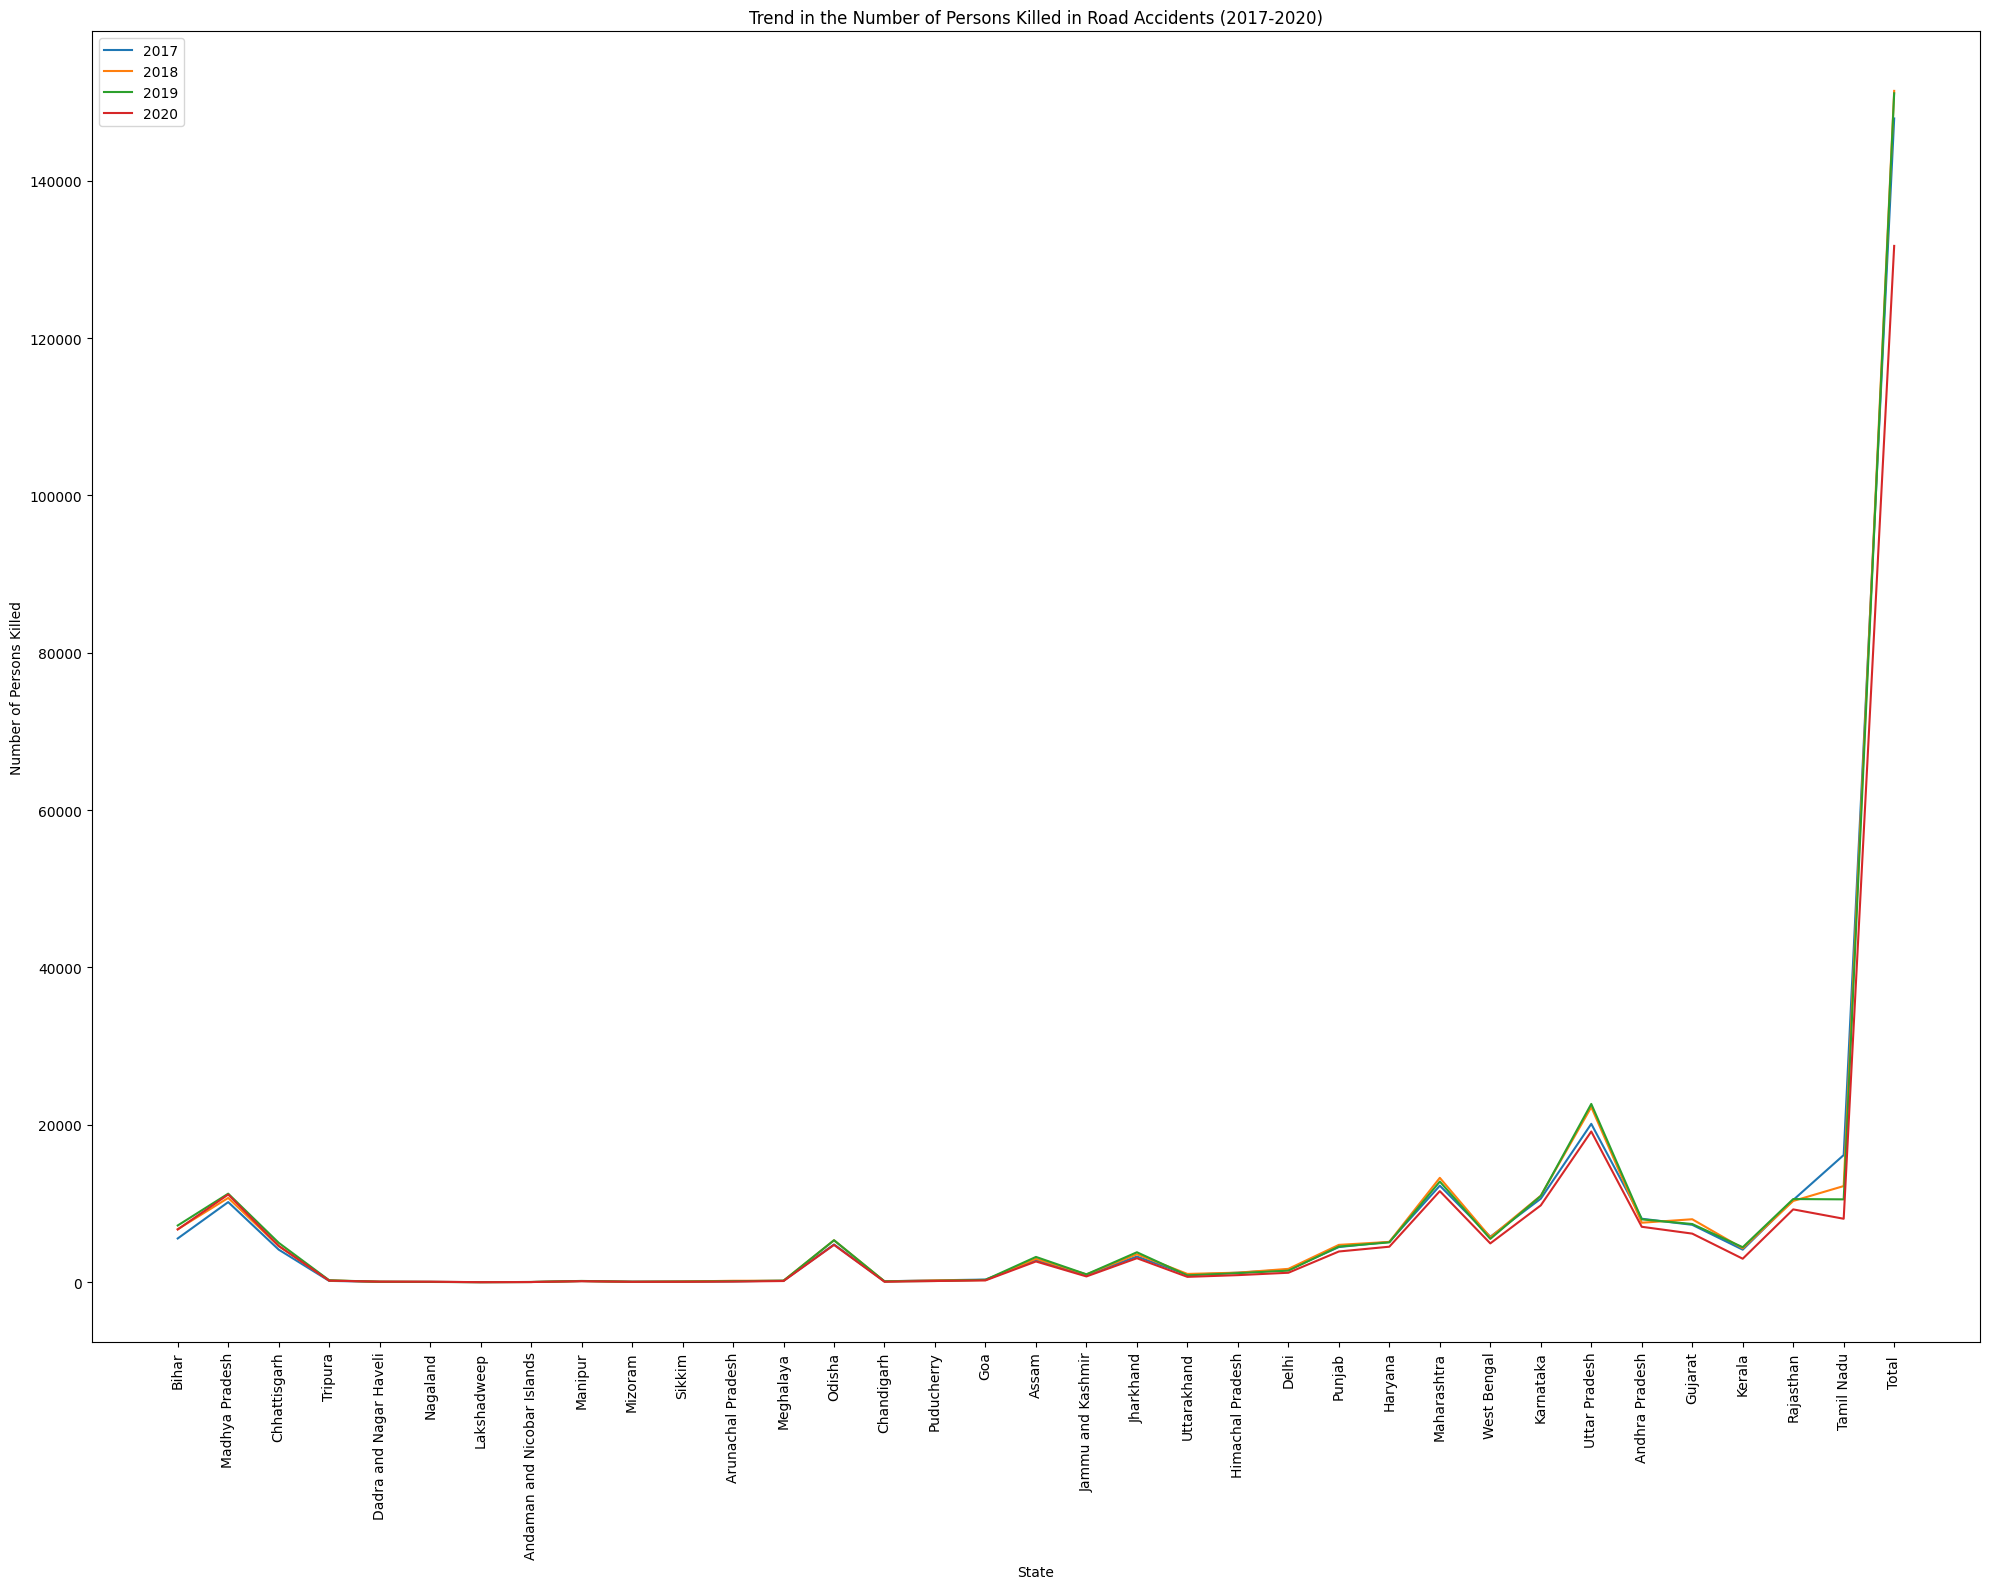

In [ ]:
persons_killed_sorted = persons_killed.sort_values(by='Trend', ascending=False)

plt.figure(figsize=(20, 16))
plt.plot(persons_killed_sorted['State'], persons_killed_sorted['Persons_Killed_2017'], label='2017')
plt.plot(persons_killed_sorted['State'], persons_killed_sorted['Persons_Killed_2018'], label='2018')
plt.plot(persons_killed_sorted['State'], persons_killed_sorted['Persons_Killed_2019'], label='2019')
plt.plot(persons_killed_sorted['State'], persons_killed_sorted['Persons_Killed_2020'], label='2020')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Number of Persons Killed')
plt.title('Trend in the Number of Persons Killed in Road Accidents (2017-2020)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Extract the relevant columns
columns = ['State', 'Share_in_Death-_2017', 'Share_in_Death-_2018', 'Share_in_Death-_2019', 'Share_in_Death-_2020']
share_of_deaths = rac[columns]

# Calculate the changes in the share of deaths from 2017 to 2020
share_of_deaths['Change_2017_to_2020'] = share_of_deaths['Share_in_Death-_2020'] - share_of_deaths['Share_in_Death-_2017']

# Identify states with significant changes
significant_changes = share_of_deaths[abs(share_of_deaths['Change_2017_to_2020']) > 0.1]

# Print the states with significant changes
print(significant_changes[['State', 'Change_2017_to_2020']])



               State  Change_2017_to_2020
0     Andhra Pradesh                 -0.1
2              Assam                 -0.2
3              Bihar                  0.6
4       Chhattisgarh                  0.2
6            Gujarat                 -0.8
7            Haryana                 -0.5
8   Himachal Pradesh                 -0.2
10         Jharkhand                 -0.2
11         Karnataka                 -0.7
12            Kerala                 -0.8
13    Madhya Pradesh                  0.5
14       Maharashtra                 -0.6
19            Odisha                 -0.1
20            Punjab                 -0.4
21         Rajasthan                 -1.0
23        Tamil Nadu                 -5.6
26       Uttarakhand                 -0.2
27     Uttar Pradesh                 -0.9
28       West Bengal                 -0.6
33             Delhi                 -0.3
36            Total                 -12.8


In [ ]:
columns = ['State', 'Persons_Killed_Per_Lakh_Population_-_2017', 'Persons_Killed_Per_Lakh_Population_-_2018', 'Persons_Killed_Per_Lakh_Population_-_2019', 'Persons_Killed_Per_Lakh_Population_-_2020']
persons_killed_rates = rac[columns]

# Print the rate of persons killed per lakh population for each year
print(persons_killed_rates)
# Calculate the average rate for each state
persons_killed_rates['Average_Rate'] = persons_killed_rates.mean(axis=1)

# Define threshold values for high and low rates
high_threshold = persons_killed_rates['Average_Rate'].mean()
low_threshold = persons_killed_rates['Average_Rate'].mean()

# Identify states with consistently high or low rates
high_rates = persons_killed_rates[persons_killed_rates['Average_Rate'] > high_threshold]
low_rates = persons_killed_rates[persons_killed_rates['Average_Rate'] < low_threshold]

# Print states with consistently high rates
print("States with consistently high rates:")
print(high_rates[['State', 'Average_Rate']])

# Print states with consistently low rates
print("States with consistently low rates:")
print(low_rates[['State', 'Average_Rate']])


                          State  Persons_Killed_Per_Lakh_Population_-_2017  \
0                Andhra Pradesh                                        9.1   
1             Arunachal Pradesh                                        8.3   
2                         Assam                                        8.5   
3                         Bihar                                        5.3   
4                  Chhattisgarh                                       15.8   
5                           Goa                                       16.2   
6                       Gujarat                                       11.5   
7                       Haryana                                       18.4   
8              Himachal Pradesh                                       16.8   
9             Jammu and Kashmir                                        7.4   
10                    Jharkhand                                        9.6   
11                    Karnataka                                 

TypeError: can only concatenate str (not "float") to str

In [ ]:
columns = ['State', 'Persons_Killed_2017', 'Persons_Killed_2018', 'Persons_Killed_2019', 'Persons_Killed_2020',
           'Persons_Killed_Per_Lakh_Population_-_2017','Persons_Killed_Per_Lakh_Population_-_2018',
           'Persons_Killed_Per_Lakh_Population_-_2019','Persons_Killed_Per_Lakh_Population_-_2020',
           'Persons_Killed_per_10,000_Vehicles_-_2017','Persons_Killed_per_10,000_Vehicles_-_2018',
           'Persons_Killed_per_10,000_Vehicles_-_2019','Persons_Killed_per_10,000_Km_of_Roads_-_2017',
           'Persons_Killed_per_10,000_Km_of_Roads_-_2018']
data_subset = rac[columns]

# Calculate the correlation matrix
correlation_matrix = data_subset.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: 'Andhra Pradesh'

In [ ]:
columns = ['State','Injury_Per_Lakh_Population_-_2017',
           'Injury_Per_Lakh_Population_-_2018',
           'Injury_Per_Lakh_Population_-_2019',
           'Injury_Per_Lakh_Population_-_2020',]
persons_injuried_rates = rac[columns]

# Print the rate of persons killed per lakh population for each year
print(persons_injuried_rates)

                          State  Injury_Per_Lakh_Population_-_2017  \
0                Andhra Pradesh                          30.858651   
1             Arunachal Pradesh                          23.813112   
2                         Assam                          18.783907   
3                         Bihar                           5.724130   
4                  Chhattisgarh                          47.926373   
5                           Goa                          95.007415   
6                       Gujarat                          26.446515   
7                       Haryana                          37.099900   
8              Himachal Pradesh                          76.241085   
9             Jammu and Kashmir                          59.139099   
10                    Jharkhand                          11.500191   
11                    Karnataka                          84.182668   
12                       Kerala                         118.950185   
13               Mad

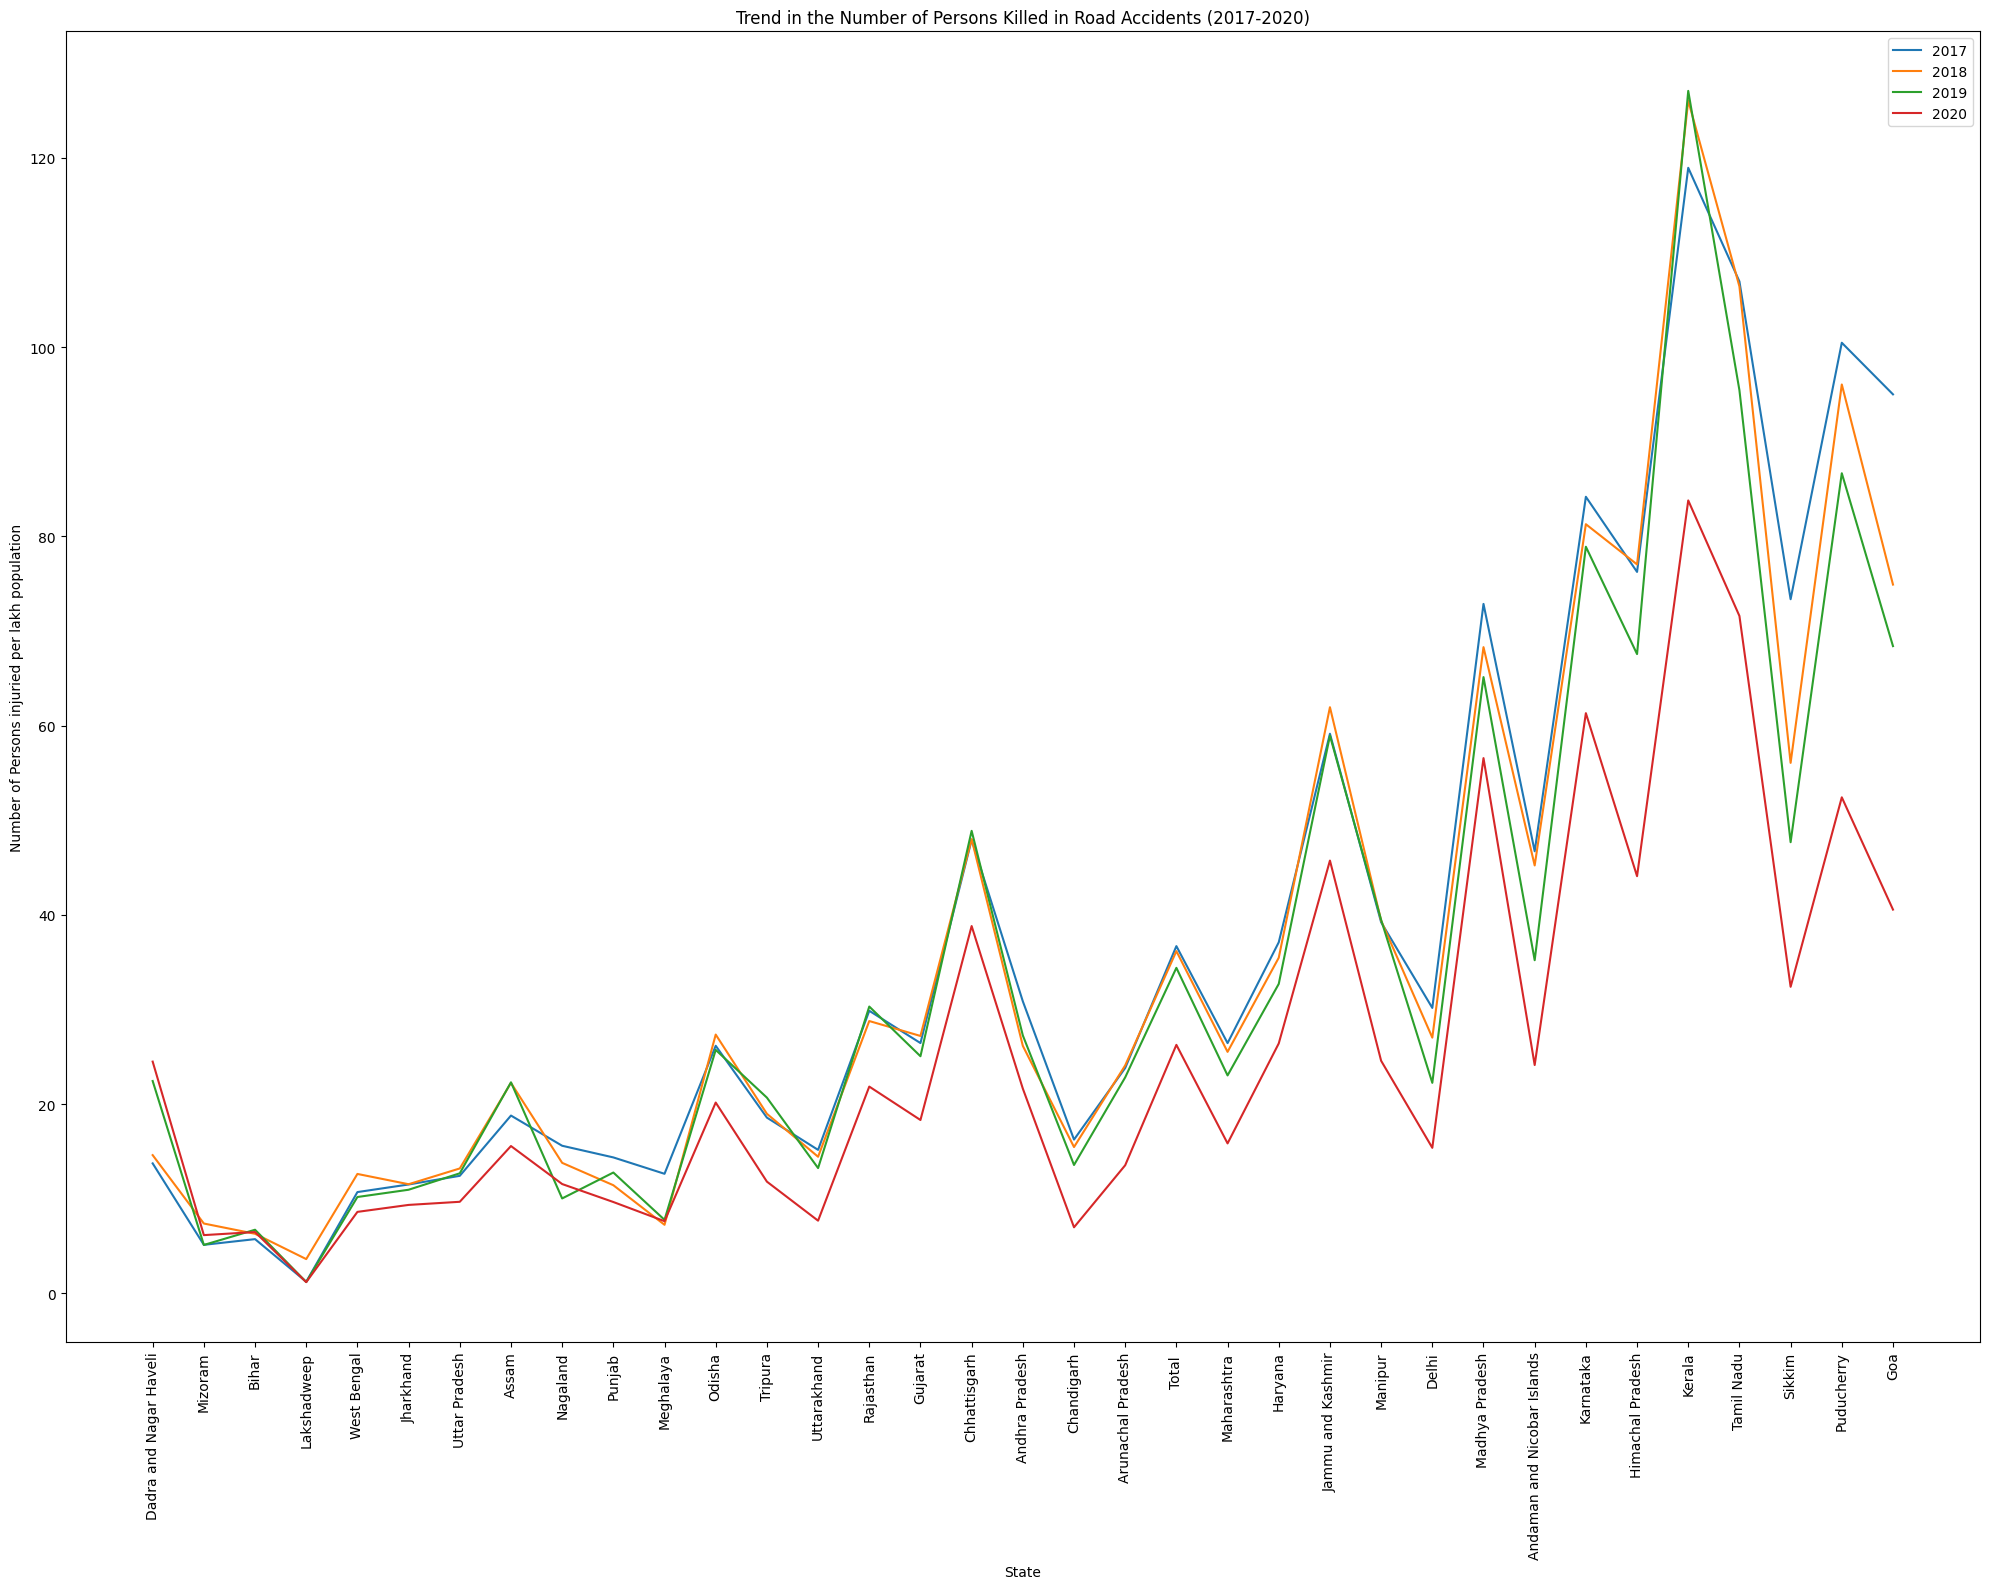

In [ ]:
persons_injuried_rates['Trend'] = persons_injuried_rates['Injury_Per_Lakh_Population_-_2020'] - persons_injuried_rates['Injury_Per_Lakh_Population_-_2017']

# Identify states with consistently high fatality rates
high_fatality_states = persons_injuried_rates[persons_injuried_rates['Trend'] > 0]

persons_injuried_sorted = persons_injuried_rates.sort_values(by='Trend', ascending=False)

plt.figure(figsize=(20, 16))
plt.plot(persons_injuried_sorted['State'], persons_injuried_sorted['Injury_Per_Lakh_Population_-_2017'], label='2017')
plt.plot(persons_injuried_sorted['State'], persons_injuried_sorted['Injury_Per_Lakh_Population_-_2018'], label='2018')
plt.plot(persons_injuried_sorted['State'], persons_injuried_sorted['Injury_Per_Lakh_Population_-_2019'], label='2019')
plt.plot(persons_injuried_sorted['State'], persons_injuried_sorted['Injury_Per_Lakh_Population_-_2020'],label ='2020')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Number of Persons injuried per lakh population')
plt.title('Trend in the Number of Persons Killed in Road Accidents (2017-2020)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
columns = ['State', 'Injury_per_10,000_Km_of_Roads_-_2016', 'Injury_per_10,000_Km_of_Roads_-_2017','Injury_per_10,000_Km_of_Roads_-_2018']
injury_road = rac[columns]

# Calculate the change in injuries per 10,000 km of roads
injury_road['Change'] = injury_road['Injury_per_10,000_Km_of_Roads_-_2018'] - injury_road['Injury_per_10,000_Km_of_Roads_-_2016']

# Sort the DataFrame by the change in descending order
injury_road_sorted = injury_road.sort_values(by='Change', ascending=False)

# Print the states with significant changes
threshold = 0.5  # Define the threshold for significant change
significant_changes = injury_road_sorted[abs(injury_road_sorted['Change']) > threshold]
print(significant_changes)

                          State  Injury_per_10,000_Km_of_Roads_-_2016  \
31       Dadra and Nagar Haveli                            529.228869   
2                         Assam                            187.029619   
30                   Chandigarh                           1070.553746   
27                Uttar Pradesh                            650.881207   
26                  Uttarakhand                            267.296115   
25                      Tripura                            182.395251   
34                  Lakshadweep                             47.810289   
28                  West Bengal                            318.599157   
19                       Odisha                            388.707677   
17                      Mizoram                             67.834405   
4                  Chhattisgarh                           1309.893853   
18                     Nagaland                            103.838106   
1             Arunachal Pradesh                    

In [ ]:
columns = ['State','Injury_per_10,000_Km_of_Roads_-_2016',
           'Injury_per_10,000_Km_of_Roads_-_2017',
           'Injury_per_10,000_Km_of_Roads_-_2018']
injuries_per_10k = rac[columns]

# Calculate the changes in the share of deaths from 2017 to 2020
injuries_per_10k['Change_2016_to_2018'] = injuries_per_10k['Injury_per_10,000_Km_of_Roads_-_2016'] - injuries_per_10k['Injury_per_10,000_Km_of_Roads_-_2018']

# Identify states with significant changes
significant_changes = injuries_per_10k[abs(injuries_per_10k['Change_2016_to_2018']) > 0.1]

# Print the states with significant changes
print(significant_changes[['State', 'Change_2016_to_2018']])

                          State  Change_2016_to_2018
0                Andhra Pradesh           447.370597
1             Arunachal Pradesh            41.835598
2                         Assam           -30.455660
3                         Bihar            43.263050
4                  Chhattisgarh            33.791392
5                           Goa           418.329814
6                       Gujarat           132.024927
7                       Haryana           260.921441
8              Himachal Pradesh           185.524410
9             Jammu and Kashmir           799.196962
10                    Jharkhand           103.743263
11                    Karnataka           109.784370
12                       Kerala           333.534389
13               Madhya Pradesh           533.174594
14                  Maharashtra            66.818259
15                      Manipur            52.974724
16                    Meghalaya           112.288345
17                      Mizoram            25.

In [ ]:
features =rac.drop(columns={'State','Road_Accidents__during_2018', '_Road_Accidents__during_2019','Road_Accidents__during_2020'})
features.columns



Index(['Accidents__Per_Lakh_Population_-_2017',
       'Total_Number_of_Accidents__Per_Lakh_Population_-_2018',
       'Total_Number_of_Accidents__Per_Lakh_Population_-_2019',
       'Total_Number_of_Accidents__Per_Lakh_Population_-_2020',
       'Accidents_per_10,000_Vehicles_-_2017',
       'Accidents_per_10,000_Vehicles_-_2018',
       'Accidents_per_10,000_Vehicles_-_2019',
       'Accidents_per_10,000_Km_of_Roads_-_2017',
       'Accidents_per_10,000_Km_of_Roads_-_2018', 'Persons_Killed_2017',
       'Persons_Killed_2018', 'Persons_Killed_2019', 'Persons_Killed_2020',
       'Share_in_Death-_2017', 'Share_in_Death-_2018', 'Share_in_Death-_2019',
       'Share_in_Death-_2020', 'Persons_Killed_Per_Lakh_Population_-_2017',
       'Persons_Killed_Per_Lakh_Population_-_2018',
       'Persons_Killed_Per_Lakh_Population_-_2019',
       'Persons_Killed_Per_Lakh_Population_-_2020',
       'Persons_Killed_per_10,000_Vehicles_-_2017',
       'Persons_Killed_per_10,000_Vehicles_-_2018',
     

In [ ]:
target = rac[['Road_Accidents__during_2018', '_Road_Accidents__during_2019','Road_Accidents__during_2020']]
target.columns


Index(['Road_Accidents__during_2018', '_Road_Accidents__during_2019',
       'Road_Accidents__during_2020'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# X_train and y_train are the training features and target, respectively
# X_test and y_test are the test features and target, respectively

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (28, 41) (28, 3)
Test set shape: (7, 41) (7, 3)


In [ ]:
!pip install factor_analyzer



ERROR: Could not find a version that satisfies the requirement factor_analyzer (from versions: none)
ERROR: No matching distribution found for factor_analyzer


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,accuracy_score
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer


In [ ]:
fa = FactorAnalyzer(n_factors=5)
fa.fit_transform(X_train.select_dtypes(exclude= ('object','category')))
fa.loadings_


NameError: name 'FactorAnalyzer' is not defined

In [ ]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(y_test)
print("X:",X_train[:1])
print("Y:",y_test[:1])

X:     Accidents__Per_Lakh_Population_-_2017  \
12                                  106.7   

    Total_Number_of_Accidents__Per_Lakh_Population_-_2018  \
12                                              110.9       

    Total_Number_of_Accidents__Per_Lakh_Population_-_2019  \
12                                              112.9       

    Total_Number_of_Accidents__Per_Lakh_Population_-_2020  \
12                                               76.6       

    Accidents_per_10,000_Vehicles_-_2017  \
12                                  34.0   

    Accidents_per_10,000_Vehicles_-_2018  \
12                                  32.6   

    Accidents_per_10,000_Vehicles_-_2019  \
12                                  30.8   

    Accidents_per_10,000_Km_of_Roads_-_2017  \
12                                   1599.2   

    Accidents_per_10,000_Km_of_Roads_-_2018  Persons_Killed_2017  ...  \
12                                   1562.9                 4131  ...   

    Injury_Per_Lakh_Populati

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print("Predict",pred)

Predict [[ 4.45471184e+04  4.37980442e+04  3.50832391e+04]
 [ 3.57695172e+04  3.34245923e+04  3.43915702e+04]
 [-4.80051243e+01 -3.18259679e+00  1.66982039e+02]
 [ 3.05863327e+04  3.12778194e+04  2.26103327e+04]
 [-8.09877091e+02 -5.10329716e+02 -4.22261017e+02]
 [ 1.43675974e+03  3.48468782e+02  1.17033221e+02]
 [ 1.21814450e+04  1.19846199e+04  1.00642325e+04]]


In [ ]:
r2_score(y_test,pred)



0.8914077683766374

In [ ]:
mean_absolute_error(y_test, pred)



3629.874901072857

In [ ]:
mean_squared_error(y_test, pred)



39296031.17158006

In [ ]:
np.sqrt(mean_squared_error(y_test,pred))



6268.6546540370255

In [ ]:
r2_score(y_train, lr.predict(X_train_scaled))



-0.11019632668364077

In [ ]:
lr.coef_

array([[ 6.44509703e+01, -6.32001735e+01,  1.97973851e+02,
        -1.07420506e+02,  2.44924471e+02, -3.51577374e+02,
        -2.43514097e+01, -2.85558874e+00, -4.47560739e-01,
         2.99472158e+00, -3.74211481e+00,  8.77051483e-01,
         1.76602482e+00, -4.74935373e+00, -2.13756543e+01,
         1.41891851e+00, -4.46719792e+01, -1.68969811e+02,
         3.03719950e+02,  9.20168300e+01, -3.23374351e+02,
        -2.15878544e+02,  1.32754144e+02, -7.12201366e+01,
         1.98493494e+00, -1.86229522e+00, -4.70868071e-01,
         3.80917641e-01,  2.08806642e+00, -1.91632842e+00,
        -3.82304422e+01,  1.48025544e+01, -2.70452883e+02,
         2.18527189e+02, -1.44983981e+01,  9.30346578e+01,
        -1.57241875e+01,  1.37590261e+02, -1.83831220e+00,
         2.98933132e+00,  3.99942989e+00],
       [ 9.12421918e+01, -1.56595311e+02,  1.99520840e+02,
         6.35962571e+01,  1.75879427e+02, -5.56504385e+02,
         8.97632070e+01, -7.49875360e+00,  1.84231763e+00,
         2.55